In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
df  = pd.read_csv("Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv", low_memory=False)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911,236638.746311,...,749768.780675,743507.948420,740969.925313,740779.387826,741056.350953,740172.835655,738291.164083,735798.371147,732748.857514,729936.251796
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588,213153.307980,...,873199.308735,859651.039278,853435.620449,853729.382881,859261.199649,870023.413651,884762.732984,899861.260508,912292.259922,920604.541480
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564,99745.413436,...,259580.385676,258628.779091,258313.807860,258572.818779,259434.215982,260365.844785,261312.633063,261764.062358,261916.246524,261763.572982
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,139544.608967,139581.891084,...,274444.283510,274268.935295,275101.487400,276077.838516,277158.265748,278409.007738,280176.702702,281874.765433,282900.414280,283388.833223
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,95588.736641,95677.479794,...,258257.378090,257082.811480,256078.547768,255852.274328,256156.810635,256375.991923,256509.265800,256072.964802,255248.998317,254014.432475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,NaN,NaN,...,121583.325890,120430.626232,121160.247730,122830.235080,123753.019481,123578.154458,122092.017493,121437.282358,120853.618646,119793.108894
21575,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,NaN,NaN,...,124397.905711,125059.867619,126007.926291,128059.244526,129545.446334,130079.953385,130911.716441,131520.105626,131550.144162,131017.006312
21576,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,NaN,NaN,...,292720.800193,294229.945253,295993.273025,298785.914710,301290.126203,303413.143227,305226.291873,306366.675179,306881.195210,306584.388100
21577,25149,30116,Hoisington,city,KS,KS,"Great Bend, KS",Barton County,NaN,NaN,...,67020.388601,66695.823572,67326.262559,68124.384668,68856.848925,70150.319018,72023.150088,74247.326229,75918.356393,77044.908106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21579 entries, 0 to 21578
Columns: 295 entries, RegionID to 2023-11-30
dtypes: float64(287), int64(2), object(6)
memory usage: 48.6+ MB


## Convert datetime to one column

In [4]:
df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911,236638.746311,...,749768.780675,743507.948420,740969.925313,740779.387826,741056.350953,740172.835655,738291.164083,735798.371147,732748.857514,729936.251796
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588,213153.307980,...,873199.308735,859651.039278,853435.620449,853729.382881,859261.199649,870023.413651,884762.732984,899861.260508,912292.259922,920604.541480
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564,99745.413436,...,259580.385676,258628.779091,258313.807860,258572.818779,259434.215982,260365.844785,261312.633063,261764.062358,261916.246524,261763.572982


In [5]:
id_vars = df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [6]:
melted = pd.melt(df,id_vars=id_vars, value_name='Value',var_name='Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,235386.064911
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,212831.058588
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,99770.762564
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,139544.608967
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,2000-01-31,95588.736641
...,...,...,...,...,...,...,...,...,...,...
6193168,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,2023-11-30,119793.108894
6193169,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,2023-11-30,131017.006312
6193170,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2023-11-30,306584.388100
6193171,25149,30116,Hoisington,city,KS,KS,"Great Bend, KS",Barton County,2023-11-30,77044.908106


In [7]:
melted.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
State          object
Metro          object
CountyName     object
Date           object
Value         float64
dtype: object

### # Now that we have our melted dataframe, we can slice out the countries of interest and begin preparing our datetime index.

In [8]:
melted['Date'][0]

'2000-01-31'

In [9]:
melted.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,235386.064911
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,212831.058588
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,99770.762564


In [10]:
# First, we will convert the 'Date' column values to datetime objects.
melted['Date'] = pd.to_datetime(melted['Date'])
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,235386.064911
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,212831.058588
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,99770.762564
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,139544.608967
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,2000-01-31,95588.736641
...,...,...,...,...,...,...,...,...,...,...
6193168,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,2023-11-30,119793.108894
6193169,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,2023-11-30,131017.006312
6193170,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2023-11-30,306584.388100
6193171,25149,30116,Hoisington,city,KS,KS,"Great Bend, KS",Barton County,2023-11-30,77044.908106


In [11]:
melted.dtypes

RegionID               int64
SizeRank               int64
RegionName            object
RegionType            object
StateName             object
State                 object
Metro                 object
CountyName            object
Date          datetime64[ns]
Value                float64
dtype: object

In [12]:
# We will need to set Date as our index, but we will NOT resample just yet
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,139544.608967
2000-01-31,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,95588.736641
...,...,...,...,...,...,...,...,...,...
2023-11-30,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,119793.108894
2023-11-30,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,131017.006312
2023-11-30,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,306584.388100


In [13]:
melted.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31',
               ...
               '2023-11-30', '2023-11-30', '2023-11-30', '2023-11-30',
               '2023-11-30', '2023-11-30', '2023-11-30', '2023-11-30',
               '2023-11-30', '2023-11-30'],
              dtype='datetime64[ns]', name='Date', length=6193173, freq=None)

In [14]:
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,139544.608967
2000-01-31,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,95588.736641


In [15]:
melted ['SizeRank'].unique

<bound method Series.unique of Date
2000-01-31        0
2000-01-31        1
2000-01-31        2
2000-01-31        3
2000-01-31        4
              ...  
2023-11-30    30116
2023-11-30    30116
2023-11-30    30116
2023-11-30    30116
2023-11-30    30116
Name: SizeRank, Length: 6193173, dtype: int64>

In [16]:
# Filter the DataFrame to include only the rows with Rank values [0, 1, 2, 3]
filtered_melted = melted[melted['SizeRank'].isin([0, 1, 2, 3])]

In [17]:
filtered_melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,139544.608967
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,236638.746311
...,...,...,...,...,...,...,...,...,...
2023-10-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,282900.414280
2023-11-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,729936.251796
2023-11-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,920604.541480


## Monthly frequency based on city

In [18]:
df_city_monthly = filtered_melted.groupby('RegionName').resample('M').asfreq()
df_city_monthly

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   
...                         ...       ...        ...        ...       ...   
New York   2023-07-31      6181         0   New York       city        NY   
           2023-08-31      6181         0   New York       city        NY   
           2023-09-30      6181         0   New York       city        NY   
           2023-10-31      6181         0   New York       city        NY   
           2023-11-30      6181         0   New York       city        NY   

                      State                                  Metro  \
RegionName Date                                                      
Chicago    2000-01-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-02-29    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-03-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-04-30    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-05-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
...                     ...                                    ...   
New York   2023-07-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-08-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-09-30    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-10-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-11-30    NY  New York-Newark-Jersey City, NY-NJ-PA   

                          CountyName          Value  
RegionName Date                                      
Chicago    2000-01-31    Cook County  139544.608967  
           2000-02-29    Cook County  139581.891084  
           2000-03-31    Cook County  139930.788018  
           2000-04-30    Cook County  140831.833595  
           2000-05-31    Cook County  141984.604541  
...                              ...            ...  
New York   2023-07-31  Queens County  740172.835655  
           2023-08-31  Queens County  738291.164083  
           2023-09-30  Queens County  735798.371147  
           2023-10-31  Queens County  732748.857514  
           2023-11-30  Queens County  729936.251796  

[1148 rows x 9 columns]

# 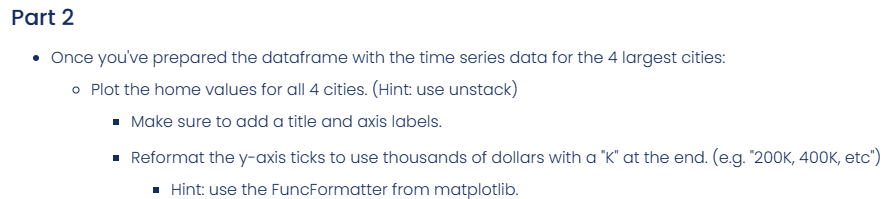

In [19]:
# This operation is used to pivot the DataFrame. It moves the values of the specified level (in this case, level 0) of the DataFrame's multi-level index to become columns. 
# This essentially transforms the DataFrame from a multi-level index structure to a more tabular format.
# ['Value']: After unstacking, it selects the column named 'Value' from the resulting DataFrame. 
# The assumption here is that 'Value' is a column containing the actual data values.
df_city_monthly_unstacked = df_city_monthly.unstack(level=0)['Value']
df_city_monthly_unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,139544.608967,99770.762564,212831.058588,235386.064911
2000-02-29,139581.891084,99745.413436,213153.307980,236638.746311
2000-03-31,139930.788018,99607.387957,214097.263791,237921.087373
2000-04-30,140831.833595,99566.590591,215980.879821,240388.532500
2000-05-31,141984.604541,99551.398920,218333.277792,242893.129921
...,...,...,...,...
2023-07-31,278409.007738,260365.844785,870023.413651,740172.835655
2023-08-31,280176.702702,261312.633063,884762.732984,738291.164083
2023-09-30,281874.765433,261764.062358,899861.260508,735798.371147


In [20]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"


fmt_thous = mticks.FuncFormatter(thousands)

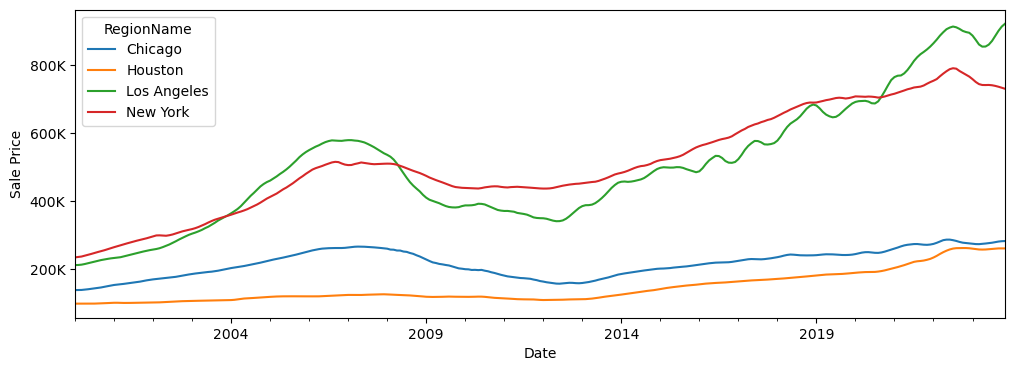

In [21]:
ax = df_city_monthly_unstacked.plot(figsize=(12,4));
plt.ylabel('Sale Price')
ax.yaxis.set_major_formatter(fmt_thous)


# Answer the following 2 questions using pandas

### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?.

- Answer is New York and houston

In [27]:
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [30]:
# Calculate the difference in home values
df_city_monthly_unstacked.loc['12/2008'].idxmax(axis=1)

Date
2008-12-31    New York
Freq: M, dtype: object

In [31]:
# Calculate the difference in home values
df_city_monthly_unstacked.loc['12/2008'].idxmin(axis=1)

Date
2008-12-31    Houston
Freq: M, dtype: object

### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?s

In [28]:
df_city_monthly_unstacked.columns

Index(['Chicago', 'Houston', 'Los Angeles', 'New York'], dtype='object', name='RegionName')

In [33]:
# It calculates the DIFFERENCE between each row and the prior row by default (to calculate the difference between other # of rows, you can use the periods argument.)
df_city_monthly_unstacked.diff().loc['12/2008']

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-31,"-4,511.64",-856.34,"-10,230.99","-3,988.83"
